# Introduction

The goal of this project was to investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

**Focusing Questions**: 
+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?

GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

The process of analyzing, preparing, and ploting data, in purpose of seeking answers in a meaningful way is shown below.


## Step 1 Import Python Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

## Step 2 Prep The Data

Loading the dataset into DataFrame so that it can be visualized.
Then, quickly inspecting the DataFrame using `.head()` method.

In [2]:
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Step 3 Examine The Data

About data:
- GDP stands for **G**ross **D**omestic **P**roduct. GDP is a monetary measure of the market value of all final goods and services produced in a time period. 
- The GDP values are in current US dollars.

Six countries represented in the data: Chile, China, Germany, Mexico, USA, Zimbabwe

In [3]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Years represented in the data: 2000 - 2015

In [4]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Step 4 Tweak The DataFrame


Descriptive column names like "Life expectancy at birth (years)" are good for axis labeling, but little hard to work with when coding. It's a personal choice to work with lower case column names.

In [5]:
data.rename(columns={'Country':'country', 'Year':'year', 'Life expectancy at birth (years)':'life_exp', 'GDP':'gdp'}, inplace=True)
data.head()

,country,year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


---

## Step 5 Visualization

## Bar Charts To Compare Average

Average life expectancy in six nations for time span from 2000 to 2015:

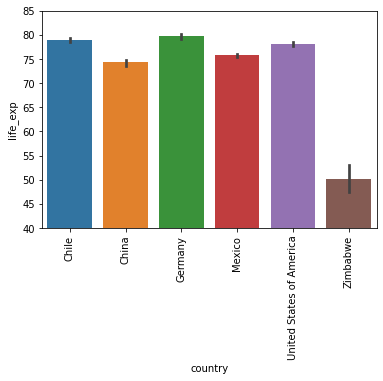

In [6]:
sb.barplot(data=data, x='country', y='life_exp')
plt.xticks(rotation=90)
plt.ylim((40, 85))
plt.show()

Average values for life expectancy depending on the country can be seen above. <br>
Conclusion: Zimbabwe has significantly lower average life expectancy and higher variation in values.

Average GDP value in six nations for time span from 2000 to 2015:

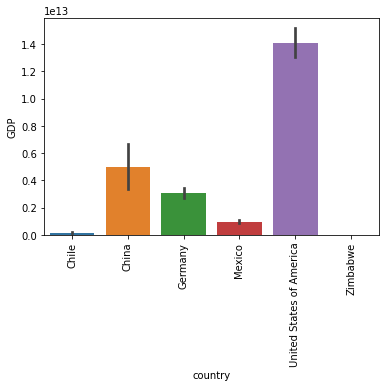

In [7]:
sb.barplot(data=data, x='country', y='gdp')
plt.xticks(rotation=90)
plt.ylabel('GDP')
plt.show()

Conclusion:
The difference between GDPs depending on country is significant. <br>
Overall, Unated States of America had the highest GDP and Zimbabwe had the lowest GDP.

## Deeper dive into life expectancy throughout the years

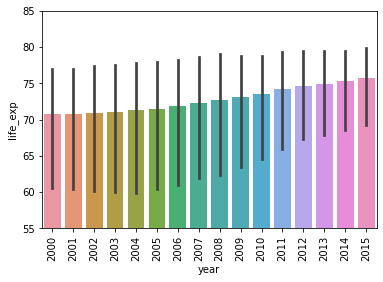

In [8]:
sb.barplot(data=data, x='year', y='life_exp')
plt.xticks(rotation=90)
plt.ylim((55,85))
plt.show()

Question: Has life expectancy increased over time in six nations?

Conclusion:
Average life expectancy for all six nations and over 15 years had steady growth. <br>
Also, range of outliers has been decreasing over the years, leading to the decreased variation of values.

In [9]:
mean_2000 = data.life_exp[data.year == 2000].mean()
mean_2015 = data.life_exp[data.year == 2015].mean()
mean_diff = mean_2015 - mean_2000
print('Mean difference in life expactancy from year 2000 to 2015 is aproximetly: ', round(mean_diff,1), 'years.')
print('Average life expectancy for year 2000 was: {}\nAverage life expectancy for year 2015 was: {}'.format(round(mean_2000,1), round(mean_2015,1)))

Mean difference in life expactancy from year 2000 to 2015 is aproximetly:  5.0 years.
Average life expectancy for year 2000 was: 70.8
Average life expectancy for year 2015 was: 75.7


Question: What is the average life expectancy in these nations?

In [10]:
le_germany = round(data.life_exp[data.country=='Germany'].mean(),1)
le_chile = round(data.life_exp[data.country=='Chile'].mean(),1)
le_usa = round(data.life_exp[data.country=='United States of America'].mean(),1)
le_mexico = round(data.life_exp[data.country=='Mexico'].mean(),1)
le_china = round(data.life_exp[data.country=='China'].mean(),1)
le_zimbabwe = round(data.life_exp[data.country=='Zimbabwe'].mean(),1)

print('Average life expectancy for every country \n Germany: {} years\n Chile: {} years\n USA: {} years\n Mexico: {} years\n China: {} years\n Zimbabwe: {} years'.format(le_germany, le_chile, le_usa, le_mexico, le_china, le_zimbabwe))

Average life expectancy for every country 
 Germany: 79.7 years
 Chile: 78.9 years
 USA: 78.1 years
 Mexico: 75.7 years
 China: 74.3 years
 Zimbabwe: 50.1 years


## Deeper dive into life expectancy depending on the country

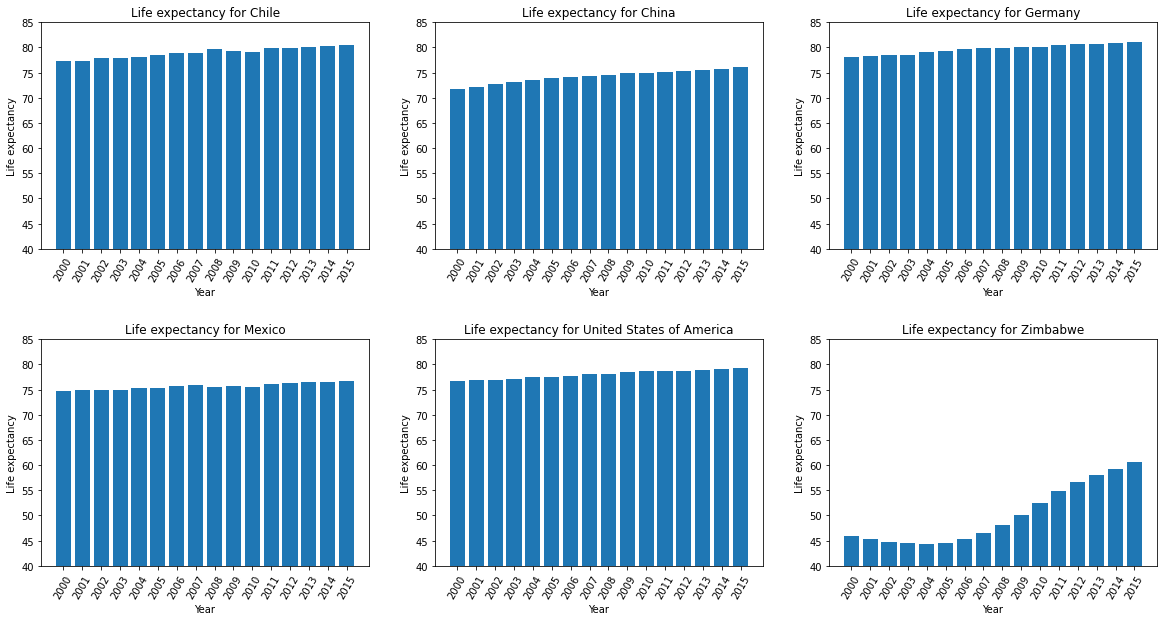

In [11]:
# Life expectancy for each country by years

countries = data.country.unique()

fig = plt.figure(figsize=(20,10))
cnt = 1
for country in countries:
    ax2 = plt.subplot(2,3,cnt)
    plt.bar(data.year[data.country==country], data.life_exp[data.country==country])
    ax2.set_xticks(data.year.unique())
    plt.xticks(rotation=60, fontsize=10)
    plt.xlabel('Year')
    plt.ylabel('Life expectancy')
    plt.title('Life expectancy for ' + country)
    plt.ylim((40,85))
    cnt += 1
plt.subplots_adjust(hspace=0.4)
plt.show()

Question: What is the distribution of life expectancy for every country?

On the bar charts above, where life expectancy data is ploted against each year, it can be seen that every country (except Zimbabwe) had uniform distribution with a slow and steady growth (and minor oscillations) through 15 years. 

Zimbabwe showed a more significant increase each year, beginning at year 2004.

## Deeper dive into GDP depending on the year or country

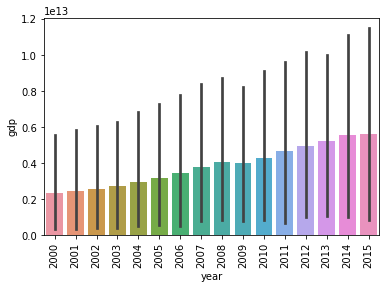

In [12]:
sb.barplot(data=data, x='year', y='gdp')
plt.xticks(rotation=90)
plt.show()

Question: Has GDP increased in six nations over time?

Conclusion:
Average GDP for all six nations (combined) has significant growth over the years. <br>
From year 2000 to year 2015, average value of GDP has doubbled.

In [13]:
gdp_2000 = data.gdp[data.year==2000].mean()
gdp_2015 = data.gdp[data.year==2015].mean()
gdp_growth = gdp_2015 - gdp_2000
gdp_growth_trillion = round(gdp_growth / 1000000000000, 1)
print('From year 2000 to year 2015, the average GDP (Gross Domestic Product) grew by $' + str(gdp_growth_trillion) + 'T.')
print('Average GDP for year 2000 was: ${}T\nAverage GDP for year 2015 was: ${}T'.format(round(gdp_2000 / 1000000000000,1), round(gdp_2015 / 1000000000000,1)))

From year 2000 to year 2015, the average GDP (Gross Domestic Product) grew by $3.3T.
Average GDP for year 2000 was: $2.4T
Average GDP for year 2015 was: $5.7T


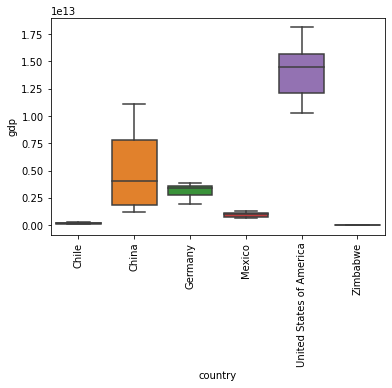

In [14]:
sb.boxplot(data=data, x='country', y='gdp')
plt.xticks(rotation=90)
plt.show()

Question: What is average GDP in these nations?

In [15]:
gdp_germany = round(data.gdp[data.country=='Germany'].mean()/1000000000000,1)
gdp_chile = round(data.gdp[data.country=='Chile'].mean()/1000000000000,1)
gdp_usa = round(data.gdp[data.country=='United States of America'].mean()/1000000000000,1)
gdp_mexico = round(data.gdp[data.country=='Mexico'].mean()/1000000000000,1)
gdp_china = round(data.gdp[data.country=='China'].mean()/1000000000000,1)
gdp_zimbabwe = round(data.gdp[data.country=='Zimbabwe'].mean()/1000000000,1)

print('Average GDP for every country \n USA: ${}T\n China: ${}T \n Germany: ${}T \n Mexico: ${}T \n Chile: ${}T \n Zimbabwe: ${}B'.format(gdp_usa, gdp_china, gdp_germany, gdp_mexico, gdp_chile, gdp_zimbabwe))

Average GDP for every country 
 USA: $14.1T
 China: $5.0T 
 Germany: $3.1T 
 Mexico: $1.0T 
 Chile: $0.2T 
 Zimbabwe: $9.1B


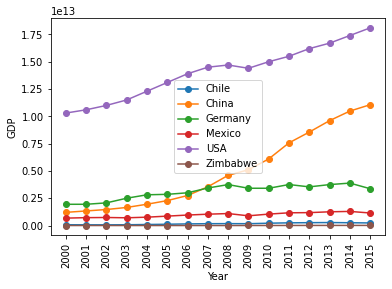

In [16]:
plt.plot(data.year[data.country=='Chile'], data.gdp[data.country=='Chile'], label='Chile', marker='o')
plt.plot(data.year[data.country=='China'], data.gdp[data.country=='China'], label='China', marker='o')
plt.plot(data.year[data.country=='Germany'], data.gdp[data.country=='Germany'], label='Germany', marker='o')
plt.plot(data.year[data.country=='Mexico'], data.gdp[data.country=='Mexico'], label='Mexico', marker='o')
plt.plot(data.year[data.country=='United States of America'], data.gdp[data.country=='United States of America'], label='USA', marker='o')
plt.plot(data.year[data.country=='Zimbabwe'], data.gdp[data.country=='Zimbabwe'], label='Zimbabwe', marker='o')
ax = plt.subplot()
ax.set_xticks(data.year.unique())
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

China is showing the most significant and rapid growth of GDP in compariosn to other countries.

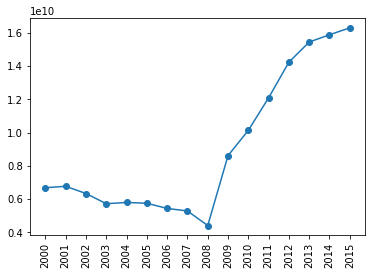

In [17]:
plt.plot(data.year[data.country=='Zimbabwe'], data.gdp[data.country=='Zimbabwe'], label='Zimbabwe', marker='o')
ax = plt.subplot()
ax.set_xticks(data.year.unique())
plt.xticks(rotation=90)
plt.show()

Rapid growth in GDP can now be seen for Zimbabwe also, but in comparison to other nations it is not significant.

## Scatter Plots of GDP and Life Expectancy Data

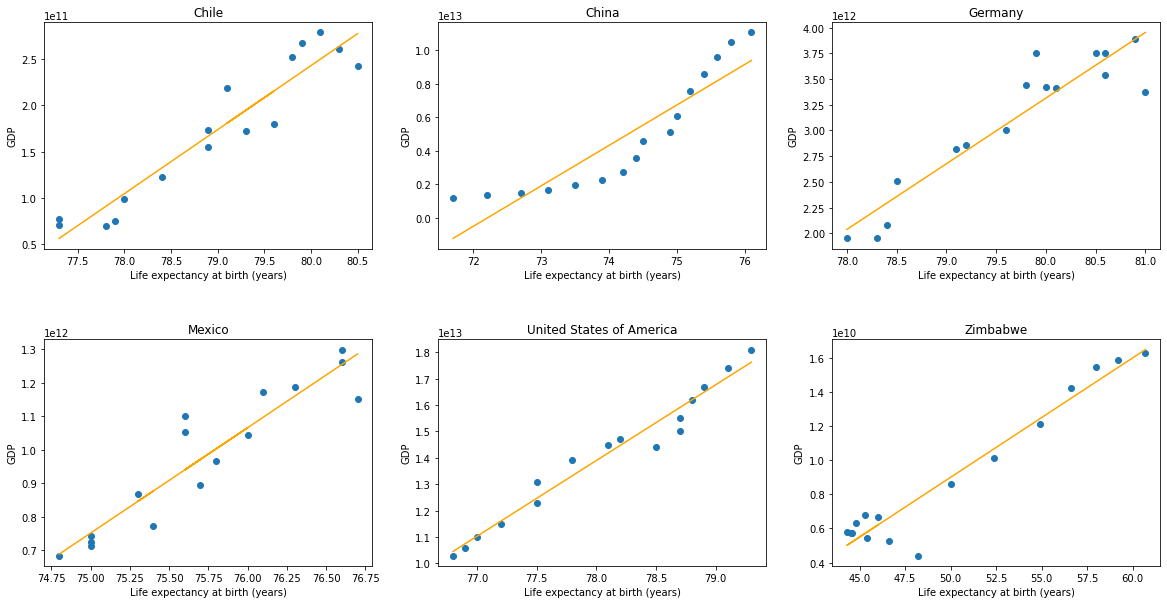

In [18]:
fig = plt.figure(figsize=(20,10))
subplot_place = 1
countries = data.country.unique()

for country in countries:
    plt.subplot(2,3,subplot_place)
    plt.scatter(data.life_exp[data.country==country], data.gdp[data.country==country])
    model1 = sm.OLS.from_formula('gdp ~ life_exp', data[data.country==country]).fit()
    plt.plot(data.life_exp[data.country==country], model1.predict(data[data.country==country]), color='orange')
    plt.xlabel('Life expectancy at birth (years)')
    plt.ylabel('GDP')
    plt.title(country)
    subplot_place += 1

fig.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Question: Is there a correlation between GDP and life expectancy of particular country?

Positive linear correlation between GDP and life expectancy for every nation can be observed in plot grid above. <br>
From this observation it can be concluded that the higher life expectancy leads to higher GDP and viceversa.